# Data Wrangling WeRateDogs tweets 

In [1]:
import os
import json
import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gather

## Read twitter archive file 

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Download image predictions file 

In [4]:
image_predctions_file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_file_name = image_predctions_file_url.split('/')[-1]
response = requests.get(image_predctions_file_url)

with open(image_predictions_file_name, 'wb') as file:
    file.write(response.content)

In [5]:
image_predictions_file_name

'image-predictions.tsv'

In [6]:
image_predictions = pd.read_csv(image_predictions_file_name, sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Get twitter data 

In [7]:
tweets_json_filename = 'tweet-json.txt'
with open(tweets_json_filename) as file:
    tweet_jsons = [json.loads(line) for line in file.read().split('\n')[:-1]]

In [8]:
tweet_jsons[2]

{'created_at': 'Mon Jul 31 00:18:03 +0000 2017',
 'id': 891815181378084864,
 'id_str': '891815181378084864',
 'full_text': 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'truncated': False,
 'display_text_range': [0, 121],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 891815175371796480,
    'id_str': '891815175371796480',
    'indices': [122, 145],
    'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg',
    'url': 'https://t.co/wUnZnhtVJB',
    'display_url': 'pic.twitter.com/wUnZnhtVJB',
    'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1201, 'h': 160

In [9]:
tweet_jsons[2]['retweet_count']

4328

In [10]:
tweet_extra_details_dicts = []
for tweet_json in tweet_jsons:
    tweet_detail = {
        'tweet_id': tweet_json['id'],
        'retweet_count': tweet_json['retweet_count'],
        'favorite_count': tweet_json['favorite_count']
    }
    tweet_extra_details_dicts.append(tweet_detail)

In [11]:
tweet_extra_details = pd.DataFrame.from_records(tweet_extra_details_dicts)
tweet_extra_details.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Assess 

## twitter-archived-enhanced.csv

In [12]:
tweets.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
420,822163064745328640,NaN,NaN,2017-01-19 19:25:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Mattie. She's extremely...,7.862340e+17,4.196984e+09,2016-10-12 15:55:59 +0000,https://twitter.com/dog_rates/status/786233965...,11,10,Mattie,None,None,None,None
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,None,None,None,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,13,10,Waffles,None,None,None,None


In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### How are the dog stage variables represented?

In [17]:
tweets.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
tweets.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

#### Are names ok?

In [19]:
tweets.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Buddy          7
Bailey         7
Daisy          7
an             7
Bella          6
Leo            6
Scout          6
Milo           6
Koda           6
Rusty          6
Dave           6
Jax            6
Stanley        6
Jack           6
Oscar          6
Louis          5
            ... 
Suki           1
Lillie         1
Skittle        1
Kobe           1
Winifred       1
Hector         1
Kawhi          1
Chuck          1
Mo             1
Stuart         1
Marlee         1
Joey           1
Ozzie          1
Genevieve      1
Wesley         1
Shelby         1
Divine         1
his            1
Rontu          1
Bauer          1
Vixen          1
Chef           1
Ed             1
Jay            1
Jimbo          1
Pavlov         1
Ralf           1
Severus       

In [20]:
tweets[tweets.name.apply(lambda s: s[0].islower())]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

#### What are the problems with rating denominator and numerators

In [21]:
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

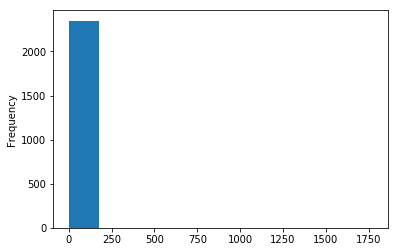

In [22]:
tweets.rating_numerator.plot.hist()

In [23]:
(tweets.rating_numerator > 20).mean()

0.010186757215619695

In [24]:
pd.set_option('max_colwidth', 400)

In [25]:
tweets[tweets.rating_numerator > 20][['text', 'rating_numerator']]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165


In [26]:
tweets[tweets['rating_denominator'] != 10][['text', 'tweet_id', 'rating_denominator']]

,text,tweet_id,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",835246439529840640,0
342,@docmisterio account started on 11/15/15,832088576586297345,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",775096608509886464,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50


#### What is expanded urls like? Why are there duplicated?

In [27]:
def get_unique_url_count(urls):
    try:
        return len(set(urls.split(',')))
    except:
        return 0
url_counts = tweets.expanded_urls.apply(get_unique_url_count)

In [28]:
url_counts.value_counts()

1    2256
0      59
2      41
Name: expanded_urls, dtype: int64

In [29]:
tweets[url_counts == 2][['text', 'expanded_urls']]

,text,expanded_urls
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1"
27,"This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b","https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1"
73,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…","https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1"
75,"Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6","https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1"
97,RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/…,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1"
98,This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1"
114,This is Cody. He zoomed too aggressively and tore his ACL. Happens to the best of us. Still 13/10\n\nHelp Cody here: https://t.co/4hxnDOt1CV https://t.co/42ryYRQ2Q4,"https://www.gofundme.com/help-fix-codys-torn-acl,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1"
124,RT @dog_rates: Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://…,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1"
126,Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://t.co/ZMTE4Mr69f https://t.co/7RyeXTYLNi,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1"
146,RT @dog_rates: Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://…,"https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1"


In [30]:
def get_only_twitter_url_counts(urls):
    if type(urls) != str:
        return np.NaN
    all_urls = set(urls.split(','))
    twitter_urls = [url for url in all_urls if url.startswith('https://twitter.com/')]
    return len(twitter_urls)

In [31]:
tweets['expanded_urls'].apply(get_only_twitter_url_counts).value_counts()

1.0    2190
0.0     107
Name: expanded_urls, dtype: int64

#### How many in reply tweets? Do they contain required information?

In [32]:
tweets[tweets['in_reply_to_status_id'].isna() == False][['text', 'in_reply_to_status_id']]

,text,in_reply_to_status_id
30,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,8.862664e+17
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,8.816070e+17
64,@RealKentMurphy 14/10 confirmed,8.795538e+17
113,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,8.707262e+17
148,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",8.634256e+17
149,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",6.671522e+17
179,@Marc_IRL pixelated af 12/10,8.571567e+17
184,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",8.558181e+17
186,@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,8.562860e+17
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,8.558616e+17


In repy to are upgrades to already given scores

#### Are replies tweets referring to existing tweets?

In [33]:
tweets_that_are_replies = tweets[tweets['in_reply_to_status_id'].isna() == False]
tweets_that_are_replies.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [34]:
tweets_that_are_not_replies = tweets[tweets['in_reply_to_status_id'].isna()]
tweets_that_are_not_replies.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ambrose. He's an Alfalfa Ballyhoo. Draws pistol fast af. Pretty much runs the frontier. 11/10 lethal pupper https://t.co/ih6epBOxIA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705428427625635840/photo/1,11,10,Ambrose,None,None,pupper,None
423,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duchess. She uses dark doggo forces to levitate her toys. 13/10 magical af https://t.co/maDNMETA52,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821765923262631936/photo/1,13,10,Duchess,doggo,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1361,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/703079050210877440/photo/1,https://twitter.com/dog_rates/status/703079050210877440/photo/1",11,10,a,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288456101888/photo/1,8,10,None,None,None,None,None


In [35]:
ids_of_non_reply_tweets = set(tweets_that_are_not_replies['tweet_id'])
ids_of_source_in_reply_tweets = set(tweets_that_are_replies['in_reply_to_status_id'].astype(int))

In [36]:
len(ids_of_non_reply_tweets.intersection(ids_of_source_in_reply_tweets))

29

#### Are dog stages extracted properly?

In [37]:
stages = ['doggo','floofer','pupper', 'puppo']

In [38]:
tweets[tweets['text'].str.lower().str.contains(stages[0]) != (tweets[stages[0]] == stages[0])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1",14,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1,11,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,NaN,NaN,NaN,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495989305348/video/1,11,10,None,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520834629632/video/1,11,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806121881602/p

In [39]:
tweets[tweets['text'].str.lower().str.contains(stages[1]) != (tweets[stages[1]] == stages[1])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
tweets[tweets['text'].str.lower().str.contains(stages[2]) != (tweets[stages[2]] == stages[2])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152071229440/photo/1,12,10,Lennon,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746056683365994496/photo/1,https://twitter.com/dog_rates/status/746056683365994496/photo/1",11,10,Arlen,None,None,None,None
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737551491075/video/1,13,10,None,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013974974464/photo/1,12,10,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1",12,10,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">

In [41]:
tweets[tweets['text'].str.lower().str.contains(stages[3]) != (tweets[stages[3]] == stages[3])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275196170240/photo/1,13,10,Venti,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/status/871879754684805121/photo/1",13,10,Lassie,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1",12,10,Lili,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284874571778/photo/1,13,10,Lucy,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884734976000/video/1,12,10,Duke,None,None,None,None


## image predictions file

In [42]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
323,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,0.996031,False,entertainment_center,0.001986,False,bookcase,0.001652,False
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
204,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,Pembroke,0.858494,True,hamster,0.026319,False,Shetland_sheepdog,0.022405,True
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/683834825250320385/pu/img/yZdrqMlyky4KGOu6.jpg,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True


In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Is p1_conf > p2_conf > p3_conf always true?

In [45]:
(image_predictions.p1_conf > image_predictions.p2_conf).mean(), (image_predictions.p2_conf > image_predictions.p3_conf).mean()

(1.0, 1.0)

In [46]:
(image_predictions.p1_dog).mean(), (image_predictions.p2_dog).mean(), (image_predictions.p3_dog).mean()

(0.7383132530120482, 0.74843373493975907, 0.72240963855421692)

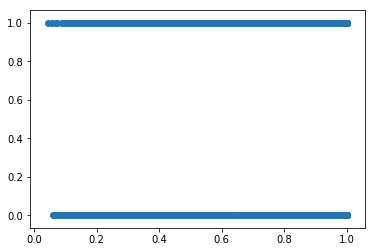

In [47]:
plt.scatter(image_predictions.p1_conf, image_predictions.p1_dog)

#### Is there multiple images in a tweet and multiple predictions?

In [48]:
len(image_predictions), image_predictions['tweet_id'].nunique()

(2075, 2075)

In [49]:
image_predictions.groupby('tweet_id')['jpg_url'].count().value_counts()

1    2075
Name: jpg_url, dtype: int64

#### img_num distribution

In [50]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### What are the predicted categories?

### Twitter details file 

In [51]:
tweet_extra_details.sample(5)

,favorite_count,retweet_count,tweet_id
115,22453,4384,870308999962521604
1008,4249,1169,747461612269887489
1609,10471,4535,685325112850124800
825,5980,1969,769212283578875904
1875,3006,1259,675109292475830276


In [52]:
tweet_extra_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


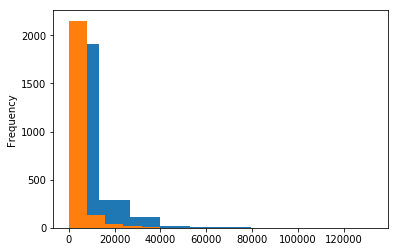

In [53]:
tweet_extra_details.favorite_count.plot.hist()
tweet_extra_details.retweet_count.plot.hist()

## Quality issues
- Retweeted tweets are there
- Timestamp and retweeted timestamp not datetime type
- Source is an html text when it should be the smaller string
- Dog names have None and many non-names (they all start with lowercase letters)
- There are few rating denominators that are not 10 which are other values interpreted as score
- When there are decimal points, the first part is not parsed when taking scores
- None and dog stage name instead of binary in dog Stages
- Dog stage name are not extracted correctly
- Some replied tweets have no scores. Some replied tweets changing scores of past ratings

## Tidyness issues 
- Expanded urls have multiple links comma seperated values
- Extra details are in a seperate table
- Not all images in a tweet has image predictions
- Some tweets have two dogs and ratings for two dogs in the text
- Image predictions do not have the final prediction as a column

# Clean 

In [54]:
tweets_clean = tweets.copy()
image_predictions_clean = image_predictions.copy()
tweet_extra_details_clean = tweet_extra_details.copy()

## 1. Combine extra details (retweet count, favorite count) data frame with main tweets dataframe

In [55]:
tweets_clean.columns, tweet_extra_details.columns

(Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
        'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
        'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
       dtype='object'),
 Index(['favorite_count', 'retweet_count', 'tweet_id'], dtype='object'))

### Design 

- Use pandas's merge function to combine datasets

### Code 

In [56]:
tweets_clean = tweets_clean.merge(tweet_extra_details_clean, on='tweet_id', how='left')

In [57]:
tweets_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,33819.0,6514.0


### Test 

In [58]:
tweets_clean.shape, tweets.shape

((2356, 19), (2356, 17))

In [59]:
tweets_clean[['retweet_count', 'favorite_count']].isna().sum()

retweet_count     2
favorite_count    2
dtype: int64

In [60]:
set(tweets['tweet_id']) - set(tweet_extra_details['tweet_id'])

{771004394259247104, 888202515573088257}

For the above tweets, the extra details were not found in the file

## 2. Change dog stage fields' values to True or False 

### Design 

- Replace None and dog stage as True and False

### Code

In [61]:
dog_type_columns = ['doggo', 'floofer', 'pupper', 'puppo']
tweets_clean[dog_type_columns] = tweets_clean[dog_type_columns].replace('None', np.NaN)
tweets_clean[dog_type_columns] = (tweets_clean[dog_type_columns].isna() == False)

### Test 

In [62]:
tweets['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [63]:
for column in dog_type_columns:
    print(column, tweets[column].value_counts()[column], tweets_clean[column].value_counts()[True])

doggo 97 97
floofer 10 10
pupper 257 257
puppo 30 30


In [64]:
tweets_clean[dog_type_columns].sum(axis=1).value_counts()

0    1976
1     366
2      14
dtype: int64

## 3. Remove retweeted tweets

### Design

- Find the the retweeted tweets using the condition
- Use the opporsite of the condition to filter tweets
- Drop the columns with retweet details

### Code

In [65]:
retweet_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tweets_clean = tweets_clean[tweets_clean[retweet_columns[0]].isna()]

In [66]:
tweets_clean.drop(columns=retweet_columns, inplace=True)

### Test

In [67]:
(tweets['retweeted_status_id'].isna() == False).sum(), len(tweets) - len(tweets_clean)

(181, 181)

In [68]:
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count'],
      dtype='object')

## 4. Remove replied tweets

### Design

- Find the the replied tweets
- Delete the tweets
- Drop the columns with reply details

### Code

In [69]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,False,False,False,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,False,False,False,False,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,False,False,False,False,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,False,False,False,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,False,False,False,False,41048.0,9774.0


In [70]:
replied_cloumns = ['in_reply_to_status_id', 'in_reply_to_user_id']
tweets_clean = tweets_clean[tweets_clean[replied_cloumns[0]].isna()]

In [71]:
tweets_clean.drop(columns=replied_cloumns, inplace=True)

### Test

In [72]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,False,False,False,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,False,False,False,False,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,False,False,False,False,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,False,False,False,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,False,False,False,False,41048.0,9774.0


## 5. Change datatype of timestamp

### Design 

- Change datatype of timestamp field to datetime

### Code

In [73]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

### Test

In [74]:
tweets.dtypes['timestamp'], tweets_clean.dtypes['timestamp']

(dtype('O'), dtype('<M8[ns]'))

In [75]:
tweets.timestamp.min(), tweets.timestamp.max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

## 5. Clean source column

### Design 

- Find regular expression
- Create function with captureing the text using regex
- Apply function on column

### Code

In [76]:
html_source_values = list(tweets_clean['source'].value_counts().index)
html_source_values

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [77]:
def capture_text_inside_html(html):
    return re.search(r'>(.*)<', html).group(1)
list(map(capture_text_inside_html, html_source_values))

['Twitter for iPhone',
 'Vine - Make a Scene',
 'Twitter Web Client',
 'TweetDeck']

In [78]:
tweets_clean['source'] = tweets_clean['source'].apply(capture_text_inside_html)

### Test

In [79]:
tweets['source'].value_counts(), tweets_clean['source'].value_counts()

(<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
 <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
 <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
 Name: source, dtype: int64, Twitter for iPhone     1964
 Vine - Make a Scene      91
 Twitter Web Client       31
 TweetDeck                11
 Name: source, dtype: int64)

## 6. Fix invalid dog names

### Design 

- Find dogs with invalid names
- Replace a and None to np.NaN

### Code

In [80]:
non_names = [name for name in tweets_clean['name'].unique() if name[0].islower()]
non_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [81]:
tweets_clean[tweets_clean['name'].isin(non_names)][['name', 'text']]

,name,text
22,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
169,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
335,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
369,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
542,incredibly,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
649,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
819,very,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d


In [82]:
def check_name(name):
    return np.NaN if name in non_names else name
tweets_clean['name'] = tweets_clean['name'].apply(check_name)

In [83]:
tweets_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

### Test

In [84]:
set(tweets['name'].unique()) - set(tweets_clean['name'].unique())

{'Gabby',
 'Tessa',
 'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [85]:
tweets[tweets['name'] == 'Gabby']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
327,833732339549220864,NaN,NaN,2017-02-20 17:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @rolltidered: This is Gabby. Now requests to be referred to as a guide dog, thanks to @dog_rates and @ShopWeRateDogs. 12/10 in my book.…",8.324344e+17,44667502.0,2017-02-17 03:39:51 +0000,https://twitter.com/rolltidered/status/832434358292209665/photo/1,12,10,Gabby,None,None,None,None


Gabby is missing because it was dropped as a retweet

In [86]:
tweets['name'].isna().sum(), tweets_clean['name'].isna().sum()

(0, 104)

## 7. Fix decimal points

### Design 

- Change datatype of numerator to float
- Correctly extract both numerator and denominator from tweet with regex

### Code

In [87]:
tweets_clean['rating_numerator'] = tweets_clean['rating_numerator'].astype(float)
tweets_clean['rating_numerator'].head()

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
Name: rating_numerator, dtype: float64

In [88]:
sample_tweet_with_decimal = tweets_clean.loc[695, 'text']
sample_tweet_with_decimal

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [89]:
sample_tweet_without_decimal = tweets_clean.loc[34, 'text']
sample_tweet_without_decimal

'This is Maisey. She fell asleep mid-excavation. Happens to the best of us. 13/10 would pat noggin approvingly https://t.co/tp1kQ8i9JF'

In [90]:
def find_rating_numerator(tweet):
    regex_for_rating = r'(\d+\.?\d*)\/(\d+)?'
    search_result = re.search(regex_for_rating, tweet)
    return float(search_result.group(1)) if search_result else np.NaN
find_rating_numerator(sample_tweet_with_decimal), find_rating_numerator(sample_tweet_without_decimal)

(9.75, 13.0)

### Test

In [91]:
tweets_clean['new_rating_numerator'] = tweets_clean['text'].apply(find_rating_numerator)
tweets_clean[tweets_clean['rating_numerator'] != tweets_clean['new_rating_numerator']][['text', 'rating_numerator', 'new_rating_numerator']]

,text,rating_numerator,new_rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,11.27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,11.26


### Code

In [92]:
tweets_clean['rating_numerator'] = tweets_clean['new_rating_numerator']
tweets_clean.drop(columns=['new_rating_numerator'], inplace=True)

### Test

In [93]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,False,False,False,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,False,False,False,False,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,False,False,False,False,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,False,False,False,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,False,False,False,False,41048.0,9774.0


## 8. Fix issues where date or other values identified as scores

### Design 

- Filter and view the ones with errors
- Manually change the values

### Code

In [94]:
multiple_slashes = tweets_clean['text'].apply(lambda t: len(re.findall(r'\d\/\d', t))> 1)
tweets_clean[multiple_slashes][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.0,10


In [95]:
tweets_clean.loc[55, 'rating_numerator'] = 13
tweets_clean.loc[313, 'rating_numerator'] = 13
tweets_clean.loc[313, 'rating_denominator'] = 10
tweets_clean.loc[1068, 'rating_numerator'] = 14
tweets_clean.loc[1068, 'rating_denominator'] = 10
tweets_clean.loc[1165, 'rating_numerator'] = 13
tweets_clean.loc[1165, 'rating_denominator'] = 10
tweets_clean.loc[1202, 'rating_numerator'] = 11
tweets_clean.loc[1202, 'rating_denominator'] = 10
tweets_clean.loc[1662, 'rating_numerator'] = 10
tweets_clean.loc[1662, 'rating_denominator'] = 10

### Test

In [96]:
tweets_clean['text'].str.len().min()

36.0

In [97]:
multiple_slashes = tweets_clean['text'].apply(lambda t: len(re.findall(r'\d\/\d', str(t)))> 1)
tweets_clean[multiple_slashes][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10.0
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10.0
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10.0
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10.0
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.0,10.0


## 9. Get breed information from image predictions data

### Design 

- Use rowwise application to get the right prediction
- Join tables to get the breed in the main table

### Code

In [98]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [99]:
def get_most_likely_breed(r):
    if r.p1_dog == True:
        return r.p1
    elif r.p2_dog == True:
        return r.p2
    elif r.p3_dog == True:
        return r.p3
    else:
        return np.NaN

In [100]:
image_predictions_clean['pred_breed'] = image_predictions_clean.apply(get_most_likely_breed, axis=1)

### Test

In [101]:
image_predictions_clean['pred_breed'].value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
German_shepherd                    21
beagle                             21
Shih-Tzu                           20
Siberian_husky                     20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
Lakeland_terrier                   19
kuvasz                             19
basset      

In [102]:
image_predictions_clean['pred_breed'].isna().sum()

324

In [103]:
no_predictions_from_data = (image_predictions_clean.p1_dog == False) & (image_predictions_clean.p2_dog == False) & (image_predictions_clean.p3_dog == False)

In [104]:
all(no_predictions_from_data == image_predictions_clean['pred_breed'].isna())

True

### Code

In [105]:
tweets_clean = tweets_clean.merge(image_predictions_clean[['tweet_id', 'pred_breed']], on='tweet_id', how='left')

### Test

In [106]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,pred_breed
0,8.924206e+17,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,False,False,False,False,39467.0,8853.0,NaN
1,8.921774e+17,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,False,False,False,False,33819.0,6514.0,NaN
2,8.918152e+17,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,False,False,False,False,25461.0,4328.0,Chihuahua
3,8.916896e+17,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,False,False,False,False,42908.0,8964.0,Labrador_retriever
4,8.913276e+17,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,False,False,False,False,41048.0,9774.0,basset


## 10. Get rating by dividing numerator by denominator

### Design 

- Get rating by dividing numerator by denominator

### Code

In [107]:
tweets_clean['rating'] = tweets_clean['rating_numerator'] / tweets_clean['rating_denominator']

### Test

In [108]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,pred_breed,rating
0,8.924206e+17,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,False,False,False,False,39467.0,8853.0,NaN,1.3
1,8.921774e+17,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,False,False,False,False,33819.0,6514.0,NaN,1.3
2,8.918152e+17,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,False,False,False,False,25461.0,4328.0,Chihuahua,1.2
3,8.916896e+17,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,False,False,False,False,42908.0,8964.0,Labrador_retriever,1.3
4,8.913276e+17,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,False,False,False,False,41048.0,9774.0,basset,1.2


## Analysis 

## 1. Does the device used to view the tweet affect the score?

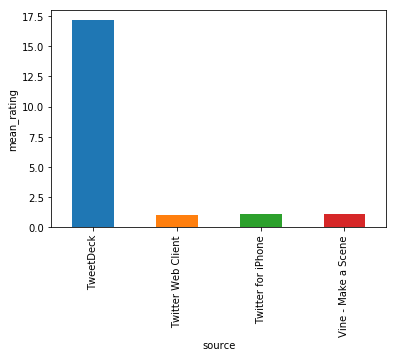

In [109]:
tweets_clean.groupby('source').mean()['rating'].plot.bar()
plt.ylabel('mean_rating');

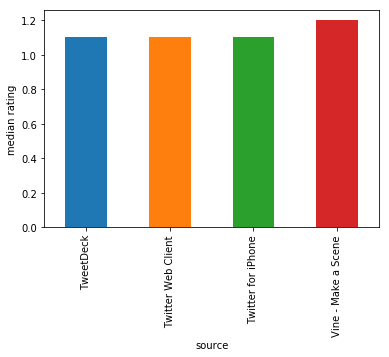

In [110]:
tweets_clean.groupby('source').median()['rating'].plot.bar()
plt.ylabel('median rating');

In [111]:
tweets_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [112]:
tweets_clean[tweets_clean['source'] == 'TweetDeck'][['rating']]

,rating
763,1.2
765,1.1
766,1.3
767,1.0
768,1.1
769,1.2
770,177.6
1485,1.1
1486,1.2
1487,0.9


Mean is high for TweetDeck. But median is similar. Observing the data for TweetDeck there is a big outlier Atticus with score 1776 that is causing this

## 2. Is there a change in rating with with time?

In [113]:
rating_by_time = tweets_clean.set_index('timestamp')['rating']
rating_by_time.head()

timestamp
2017-08-01 16:23:56    1.3
2017-08-01 00:17:27    1.3
2017-07-31 00:18:03    1.2
2017-07-30 15:58:51    1.3
2017-07-29 16:00:24    1.2
Name: rating, dtype: float64

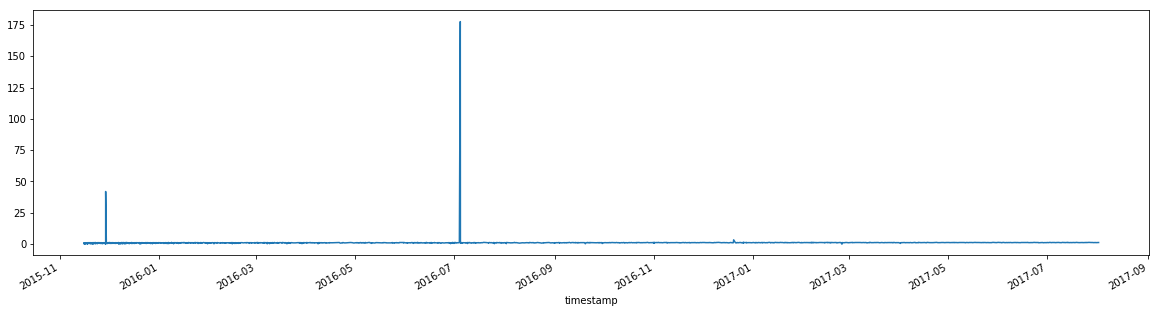

In [114]:
rating_by_time.plot(figsize=(20, 5))

Text(0,0.5,'rating')

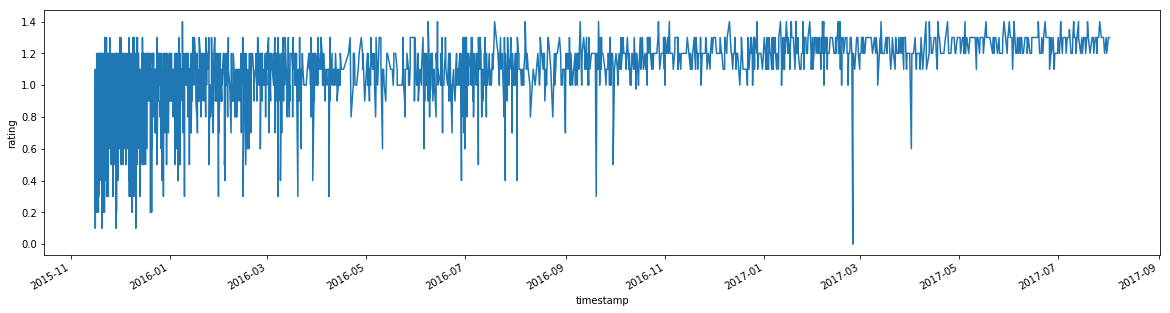

In [115]:
rating_by_time[rating_by_time < 2].plot(figsize=(20,5))
plt.ylabel('rating')

Text(0,0.5,'median rating for the week')

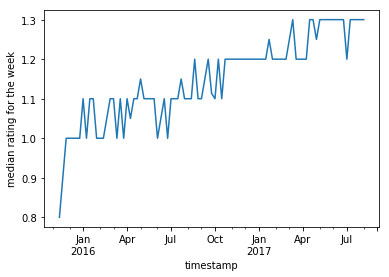

In [116]:
rating_by_time.resample('W').median().plot()
plt.ylabel('median rating for the week')

Text(0,0.5,'median rating for the month')

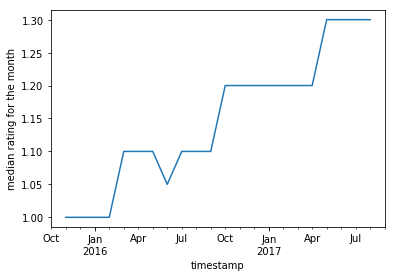

In [117]:
rating_by_time.resample('M').median().plot()
plt.ylabel('median rating for the month')

## 3. Are favorite count and retweet count strongly correlated? What is the ratio? 

In [118]:
favorite_retweet_ratio = tweets_clean['favorite_count'] / tweets_clean['retweet_count']

In [119]:
favorite_retweet_ratio.describe()

count    2097.000000
mean        3.333572
std         1.176395
min         1.097147
25%         2.517429
50%         3.157543
75%         3.896104
max        12.348718
dtype: float64

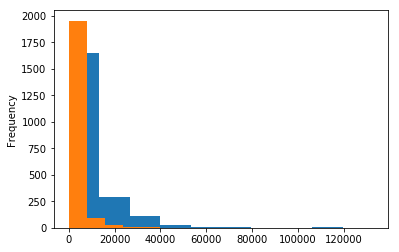

In [120]:
tweets_clean['favorite_count'].plot.hist()
tweets_clean['retweet_count'].plot.hist()

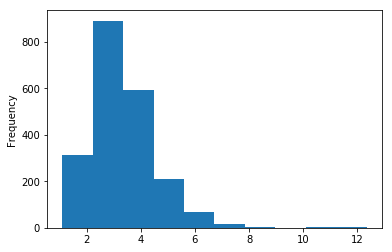

In [121]:
favorite_retweet_ratio.plot.hist()

In [122]:
tweets_clean.corr()['favorite_count']['retweet_count']

0.91120130370102936

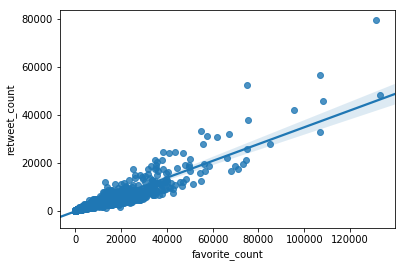

In [123]:
sns.regplot(data=tweets_clean, x='favorite_count', y='retweet_count')

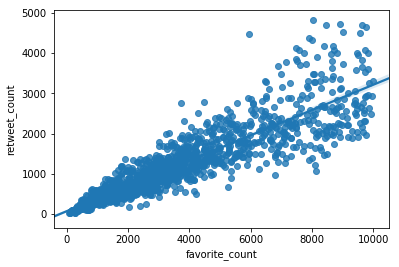

In [124]:
sns.regplot(data=tweets_clean[tweets_clean['favorite_count'] < 10000], x='favorite_count', y='retweet_count')

## 3. What are the common breeds people have?

In [125]:
breed_proportion = tweets_clean['pred_breed'].value_counts(ascending=False) / len(tweets_clean)

In [126]:
breed_proportion[:20]

golden_retriever            0.050977
Pembroke                    0.033349
Labrador_retriever          0.031920
Chihuahua                   0.026203
pug                         0.020962
Pomeranian                  0.012863
chow                        0.012387
toy_poodle                  0.011910
cocker_spaniel              0.011434
French_bulldog              0.010481
Chesapeake_Bay_retriever    0.010481
Samoyed                     0.010481
malamute                    0.010005
Eskimo_dog                  0.007623
Cardigan                    0.007146
Shih-Tzu                    0.007146
beagle                      0.006670
miniature_pinscher          0.006193
Rottweiler                  0.005717
German_shepherd             0.005717
Name: pred_breed, dtype: float64

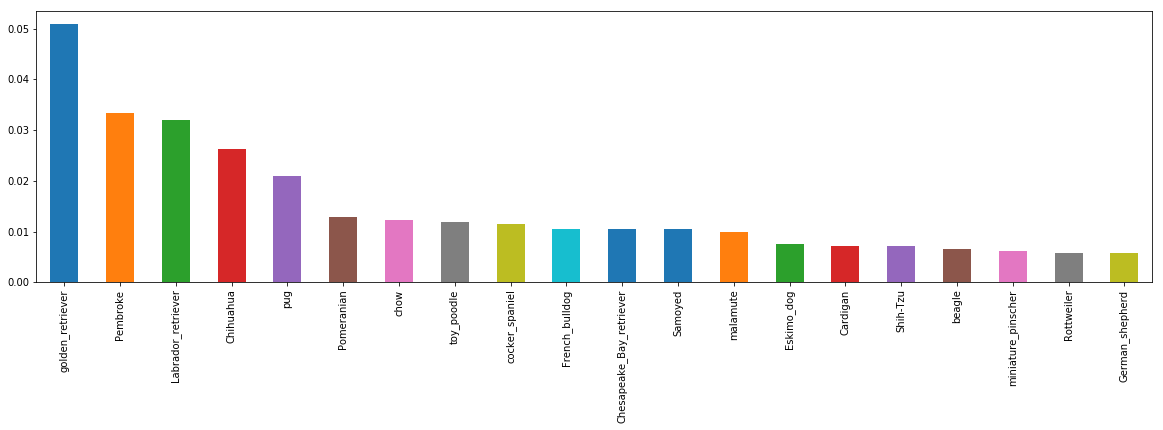

In [127]:
breed_proportion[:20].plot.bar(figsize=(20, 5))

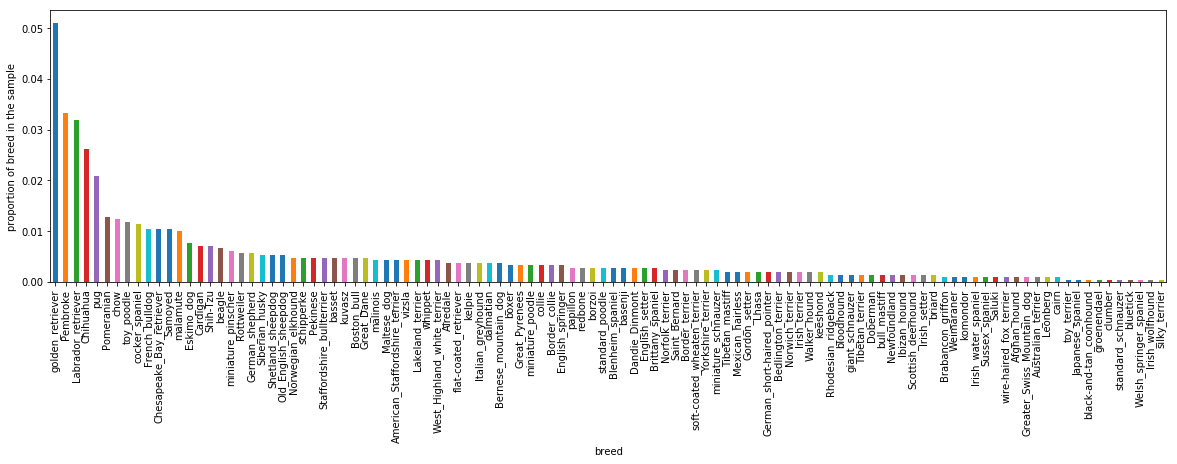

In [128]:
breed_proportion.plot.bar(figsize=(20, 5))
plt.ylabel('proportion of breed in the sample')
plt.xlabel('breed');

## 4. Which breeds have the higher ratings?

In [129]:
mean_rating_for_breed = tweets_clean.groupby('pred_breed').mean()['rating'].sort_values(ascending=False)

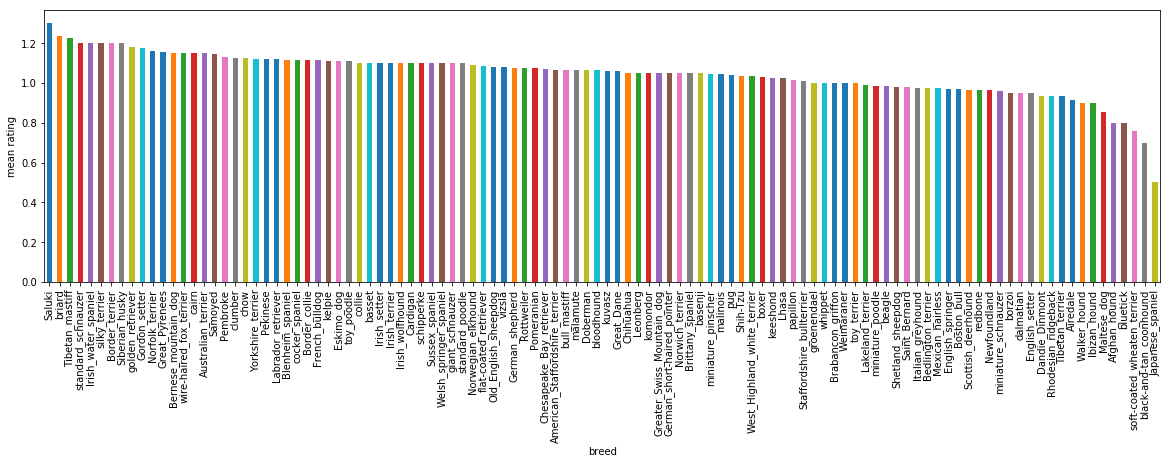

In [130]:
mean_rating_for_breed.plot.bar(figsize=(20, 5))
plt.ylabel('mean rating')
plt.xlabel('breed');

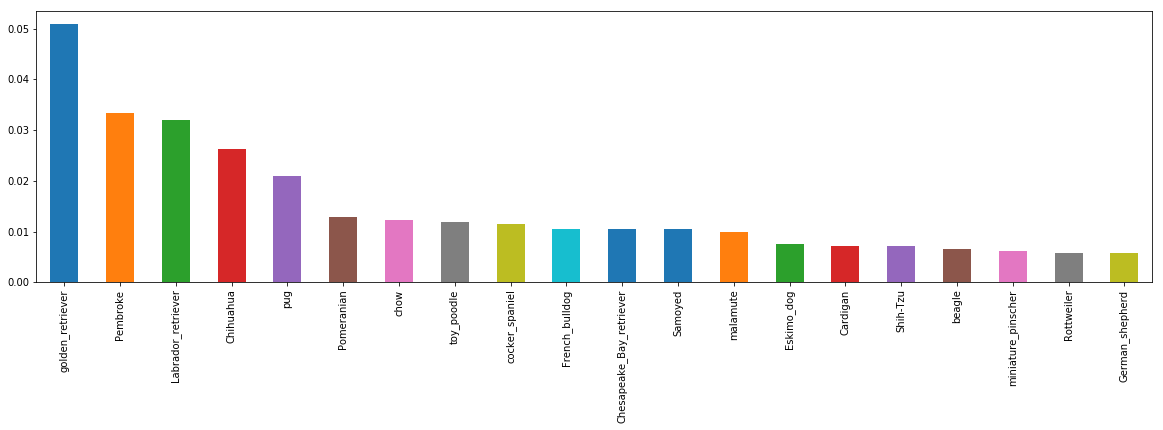

In [131]:
breed_proportion[:20].plot.bar(figsize=(20, 5))

In [132]:
mean_rating_for_breed.describe()

count    108.000000
mean       1.046448
std        0.112042
min        0.500000
25%        0.985714
50%        1.063333
75%        1.112784
max        1.300000
Name: rating, dtype: float64

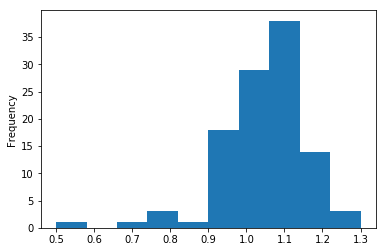

In [133]:
mean_rating_for_breed.plot.hist()

## 5. Is mean rating and breed popularity correlated?

In [134]:
breed_details = pd.DataFrame({
    'mean_rating': mean_rating_for_breed,
    'popularity': breed_proportion
})

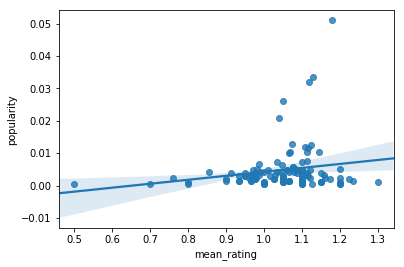

In [135]:
sns.regplot(data=breed_details, x='mean_rating', y='popularity')

In [136]:
breed_details.corr()

,mean_rating,popularity
mean_rating,1.000000,0.192061
popularity,0.192061,1.000000


## 6. Is rating and favorites correlated?

In [137]:
tweets_clean.corr()['rating']['favorite_count']

0.015947751383687123

No